<a href="https://colab.research.google.com/github/chiru30/COMP-6321-Machine-Learning/blob/main/major%20assignment/question%201/major_assignment_1_q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os

# IMPORTING DATASET

In [ ]:
url = "https://github.com/chiru30/COMP-6321-Machine-Learning/raw/main/major%20assignment/question%201/Health_Insurance_Dataset.xlsx"

excel = pd.read_excel(url, engine='openpyxl')

In [ ]:
excel.to_csv ("Health_Insurance_Dataset.csv",
                  index = None,
                  header=True)

In [ ]:
current_directory = os.getcwd()

files_in_directory = os.listdir(current_directory)

print("Current directory:", current_directory)
print("Files in current directory:", files_in_directory)

Current directory: /content
Files in current directory: ['.config', 'Health_Insurance_Dataset.csv', 'sample_data']


In [ ]:
data= pd.read_csv("Health_Insurance_Dataset.csv")
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
print(data.isnull().sum())
print(data.duplicated().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
1


In [ ]:
data=data.drop_duplicates()
data.shape

(1337, 7)

In [ ]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

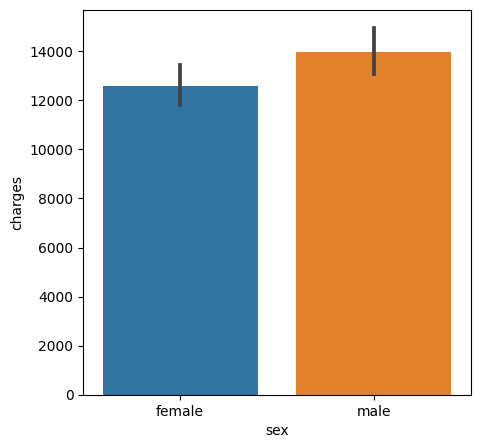

In [ ]:
plt.figure(figsize=(5, 5))
sns.barplot(x='sex', y='charges', data=data, estimator='mean')
plt.show()

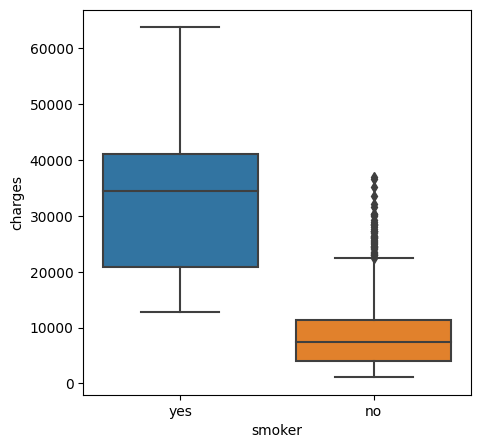

In [ ]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='smoker', y='charges', data=data)
plt.show()

<Axes: xlabel='children', ylabel='charges'>

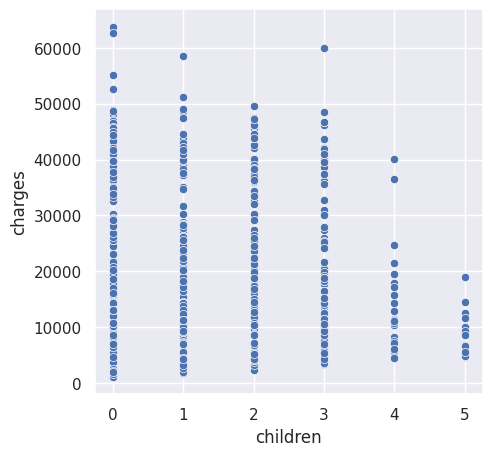

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
sns.scatterplot(data=data, x="children", y="charges")


<Axes: xlabel='age', ylabel='charges'>

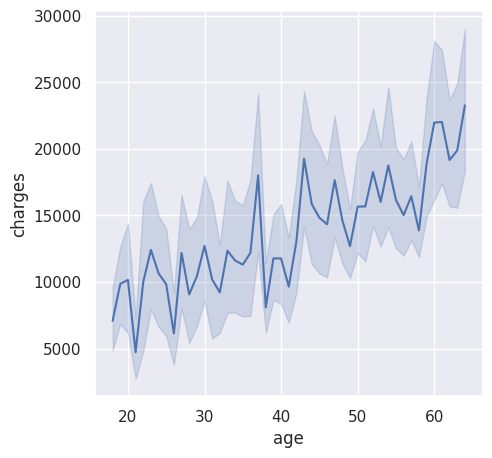

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
sns.lineplot(data=data, x="age", y="charges")


<Axes: xlabel='bmi', ylabel='charges'>

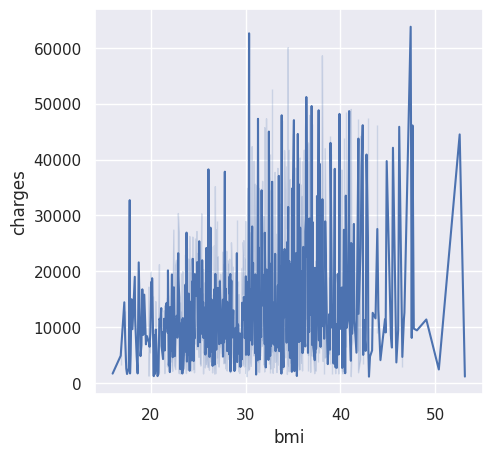

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
sns.lineplot(data=data, x="bmi", y="charges")


<ipython-input-17-7582c21d38ce>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


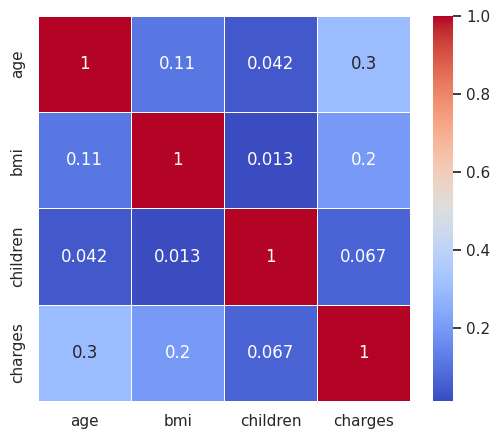

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

# DATA PREPROCESSING

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data_encoded = data.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'object' else x)

data_encoded.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_columns = ['age', 'bmi', 'children', 'charges']
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])
data_std = data_encoded.copy()

# Now, 'data_encoded' contains the label-encoded and standardized data
data_std.head()


,age,sex,bmi,children,smoker,region,charges
0,-1.440418,0,-0.453160,-0.909234,1,3,0.297857
1,-1.511647,1,0.509422,-0.079442,0,2,-0.954381
2,-0.799350,1,0.383155,1.580143,0,2,-0.729373
3,-0.443201,1,-1.305052,-0.909234,0,1,0.719104
4,-0.514431,1,-0.292456,-0.909234,0,1,-0.777499


In [ ]:
data_std.describe()

,age,sex,bmi,children,smoker,region,charges
count,1.337000e+03,1337.000000,1337.000000,1.337000e+03,1337.000000,1337.000000,1.337000e+03
mean,-1.594337e-17,0.504862,0.000000,2.790089e-17,0.204936,1.516081,-1.195753e-17
std,1.000374e+00,0.500163,1.000374,1.000374e+00,0.403806,1.105208,1.000374e+00
min,-1.511647e+00,0.000000,-2.411119,-9.092342e-01,0.000000,0.000000,-1.004247e+00
25%,-8.705798e-01,0.000000,-0.717173,-9.092342e-01,0.000000,1.000000,-7.048486e-01
50%,-1.582291e-02,1.000000,-0.043202,-7.944162e-02,0.000000,2.000000,-3.215773e-01
75%,8.389340e-01,1.000000,0.661926,7.503509e-01,0.000000,2.000000,2.790883e-01
max,1.764921e+00,1.000000,3.684136,3.239729e+00,1.000000,3.000000,4.170826e+00


# TRAIN TEST SPLITTING

In [ ]:
from sklearn.model_selection import train_test_split


X = data_std.drop('charges', axis=1)
y = data_std['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# MODEL

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
# Predict on the training set
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error (Train): {mse_train:.2f}")

# Predict on the test set
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error (Test): {mse_test:.2f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (Train): 0.24
Mean Squared Error (Test): 0.27
Mean Squared Error (MSE): 0.26567672626972866
Root Mean Squared Error (RMSE): 0.5154383826120525
Mean Absolute Error (MAE): 0.34551978831053565
R-squared (R2): 0.7724652729621757
